In [1]:
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper
from ban.base.mobility import MobilityModel, BodyPosition

import matplotlib.pyplot as plt

env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[:]
mob_helper = MobilityHelper(env)

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mob_helper.do_walking(env)

mobs_pos = [[] for _ in range(len(positions))]

def print_info(ev):
    for idx, mob in enumerate(mob_helper.mobility_list):
        pos = mob.get_position()
        mobs_pos[idx].append((pos.x, pos.y, pos.z))

    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)
    
    env.schedule(event, priority=NORMAL, delay=0.05)

print_info(env)
env.run(until=5)


In [2]:
tuple((BodyPosition))[7:]

(<BodyPosition.LEFT_ELBOW: 7>,
 <BodyPosition.LEFT_WRIST: 8>,
 <BodyPosition.RIGHT_ELBOW: 9>,
 <BodyPosition.RIGHT_WRIST: 10>,
 <BodyPosition.LEFT_KNEE: 11>,
 <BodyPosition.LEFT_ANKLE: 12>,
 <BodyPosition.RIGHT_KNEE: 13>,
 <BodyPosition.RIGHT_ANKLE: 14>,
 <BodyPosition.BODY: 15>)

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 1315.19it/s]


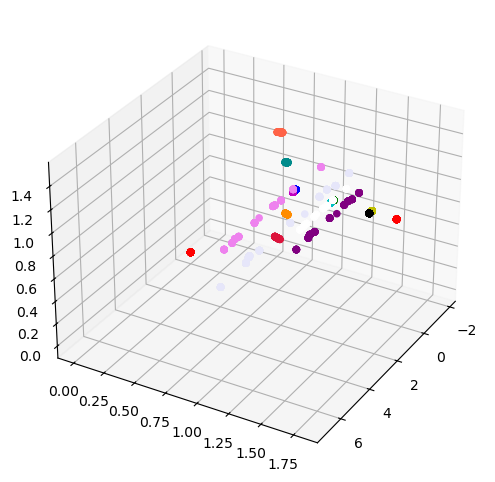

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'tomato')
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=30, azim=30)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # 각 점의 x, y, z 좌표 분리
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1)  # 점들 그리기

plt.show()


100%|██████████| 9/9 [00:00<00:00, 29.54it/s]


TypeError: Axes3D.plot() missing 1 required positional argument: 'ys'

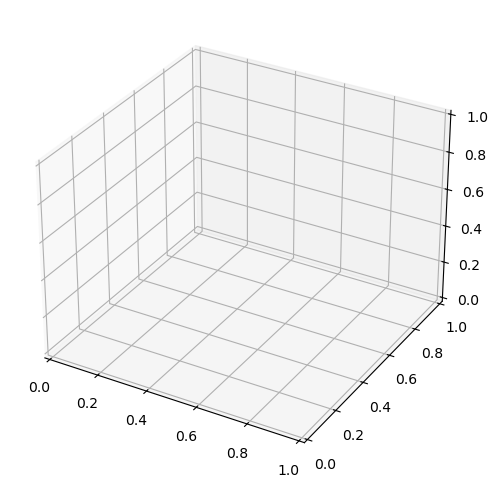

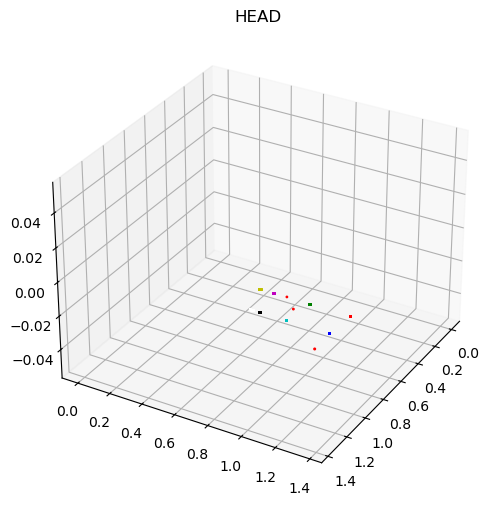

In [33]:
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm 

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'tomato')

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=30, azim=30)

for i, mob in enumerate(tqdm(mobs_pos)):
    for x, y, z in mob:
        plt.scatter(x, y, z, color=colors[i], alpha=1)

for idx, mob in enumerate(mobs):
    plt.scatter(mobs_pos[idx][0], mobs_pos[idx][1], mobs_pos[idx][2], color=colors[idx], alpha=1)
    plt.title(BodyPosition(idx).name)
    
    plt.plot(mobs_pos[idx][0], c='r')
    plt.plot(mobs_pos[idx][1], c='g')
    plt.plot(mobs_pos[idx][2], c='b')
plt.show()